## R code for plotting group specific mean and data for two variables

### Let us simuldate the data
Data will have expression values for 10 genes for 12 samples at 4 times points. We will do plot following
information using ggplot2 package. We will plot gene specific expression for each time point highlighting
expression and mean (and standard error of mean). In addtion, we will highlight expression values above
and below mean.

In [2]:
## Simulate data frame with 10 gene names and create a matrix of 10rx 12 c expression data
df1=data.frame(genes = paste0("DDB_G0267",sample(c(178:200), 10, replace = F)),matrix(sample(round(rnorm( 120, 4, 4), 2)), 10, 12))

In [3]:
## Change the names of the columns
colnames(df1)[-1] = paste0("sample", seq(1, 12))

### Let us simulate the meta data with time points, h10, h12, h14 and h16. 3 samples for each time point

In [4]:
## create a data frame for 12 sample names and 4 time points
pheno= data.frame(samples = paste0("sample", seq(1, 12)),time = rep(c("h10","h12","h14","h16"), each = 3))

### Let us calculate the means of samples (columns) and genes (rows), separately. 
Sample means can be appeneded sample meta data as sample numbers are same for both.

In [5]:
## Append expression means of each sample to the pheno data
samples=data.frame(samples=colnames(df1[-1]), sample_means=colMeans(df1[-1]), stringsAsFactors = F, time=pheno$time)
geno=data.frame(genes=df1[1],gene_means=rowMeans(df1[-1]), stringsAsFactors = F)

### Let us convert the long format to wide format

In [6]:
## Load library tidyr
library(tidyr)

## convert wide format to long format
df2=gather(df1,"samples","expression",-"genes")

### Let us merge the data with meta data. We create gene expression means for samples and times separately to merge with main data.

In [7]:
## Merge the metadata with data
library(dplyr)
df3=merge(df2,samples, by="samples")
df4=merge(df3,geno, by="genes")
df5=df4 %>% group_by(genes,time) %>% mutate(gene_time_mean=mean(expression))


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



### Let us plot the data, metadata now. First sample sample specific data, then gene specific data.
What we will do is store the plot objects and then draw them together with gridextra. 

#### Let us plot for samples first. 
There are 3 graph objects for samples. First one would be cumulative (for all 10 genes) expression values per
sample per time point with mean only, Second one would be cumulative gene expression values per sample with mean 
only and last one would be cumulative gene expression values per sample with mean and standard error only.

In [8]:
## Load library
library(ggplot2)

In [9]:
## Faceting per sample per time point, connecting the mean.

s1=ggplot(df3, aes(samples, expression))+
    geom_violin()+
    geom_jitter(aes(color=expression>sample_means), width = 0.2)+
    scale_colour_manual(values=c("darkgreen", "red"))+
    stat_summary(fun.y=mean, geom="point", aes(group=1), size=1)+
    stat_summary(color="black",  geom = "line", aes(group=1))+
    facet_grid(~time, scales = "free")+
    theme_bw()+
    theme(
        legend.position = "none",
        strip.text.x = element_text(size = 24),
        strip.background = element_blank(),
        axis.text.x = element_text(size = 14, angle=90),
        axis.text.y = element_text(size = 24),
        axis.title.x = element_blank(),
        axis.title.y = element_blank()
        )

## without faceting per sample, connecting the mean. 
s2=ggplot(df3, aes(samples, expression))+
    geom_violin()+
    geom_jitter(aes(color=expression>sample_means), width = 0.2)+
    scale_colour_manual(values=c("darkgreen", "red"))+
    stat_summary(fun.y=mean, geom="point", aes(group=1), size=1)+
    stat_summary(color="black",  geom = "line", aes(group=1))+
    theme_bw()+
    theme(
        legend.position = "none",
        axis.text.x = element_text(size = 14, angle=90),
        axis.text.y = element_text(size = 24),
        axis.title.x = element_blank(),
        axis.title.y = element_blank()
    )

## without faceting per sample with mean and se

s3=ggplot(df3, aes(samples, expression))+
    geom_violin()+
    geom_jitter(aes(color=expression>sample_means), width = 0.2)+
    scale_colour_manual(values=c("darkgreen", "red"))+
    stat_summary(fun.y=mean, geom="point", aes(group=1), size=1)+
    stat_summary(color="black",  geom = "smooth", aes(group=1))+
    theme_bw()+
    theme(
        legend.position = "none",
        axis.text.x = element_text(size = 14, angle=90),
        axis.text.y = element_text(size = 24),
        axis.title.x = element_blank(),
        axis.title.y = element_blank()
    )

#### Let us plot for genes next. 
There are 3 graph objects for genes. First one would be cumulative (for all 12 samples) expression values per
gene per time point with mean only, Second one would be cumulative sample expression values per gene with mean 
only and last one would be cumulative sample expression values per gene with mean and standard error only.

In [10]:
## Faceting per gene per time point, connecting the mean.

g1=ggplot(df5, aes(genes, expression))+
    geom_violin()+
    geom_jitter(width = 0.2, aes(color=expression>gene_time_mean))+
    scale_colour_manual(values=c("darkgreen", "red"))+
    stat_summary(fun.y=mean, geom="point", aes(group=1), size=1)+
    stat_summary(color="steelblue",  geom = "line", aes(group=1), size=1.2)+
    theme_bw()+
        theme(
        legend.position = "none",
        strip.text.x = element_text(size = 14),
        strip.background = element_blank(),
        axis.text.x = element_text(size = 14, angle=90),
        axis.text.y = element_text(size = 14),
        axis.title.x = element_blank(),
        axis.title.y = element_blank()
    )+
    facet_grid(~time)

## Without faceting per gene, connecting the mean.
g2=ggplot(df5, aes(genes, expression))+
    geom_violin()+
    geom_jitter(width = 0.2, aes(color=expression>gene_means))+
    scale_colour_manual(values=c("darkgreen", "red"))+
    stat_summary(fun.y=mean, geom="point", aes(group=1), size=1)+
    stat_summary(color="steelblue",  geom = "line", aes(group=1), size=1.2)+
    theme_bw()+
    theme(
        legend.position = "none",
        axis.text.x = element_text(size = 14, angle=90),
        axis.text.y = element_text(size = 14),
        axis.title.x = element_blank(),
        axis.title.y = element_blank()
    )

##Without faceting per gene, connecting the mean + se

g3=ggplot(df5, aes(genes, expression))+
    geom_violin()+
    geom_jitter(width = 0.2, aes(color=expression>gene_means))+
    scale_colour_manual(values=c("darkgreen", "red"))+
    stat_summary(fun.y=mean, geom="point", aes(group=1), size=1)+
    stat_summary(color="steelblue",  geom = "smooth", aes(group=1), size=1.2)+
    theme_bw()+
    theme(
        legend.position = "none",
        axis.text.x = element_text(size = 14, angle=90),
        axis.text.y = element_text(size = 14),
        axis.title.x = element_blank(),
        axis.title.y = element_blank()
    )

### Let us plot altogether


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine

No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()


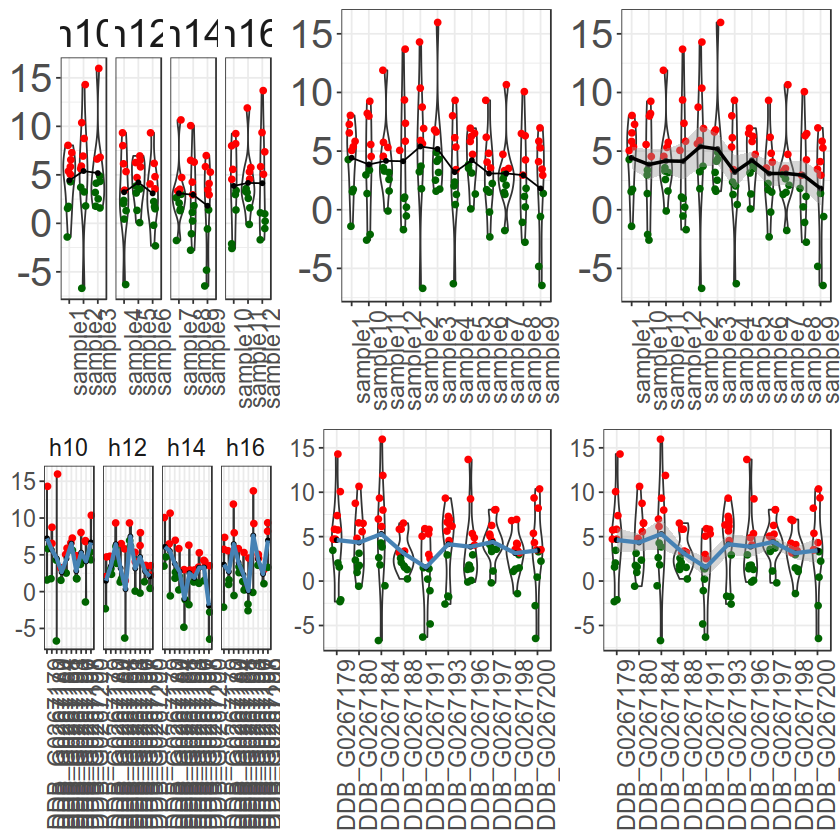

In [11]:
library(gridExtra)
grid.arrange(s1,s2,s3,g1,g2,g3, nrow = 2, ncol=3)

### Let us draw a heatmap

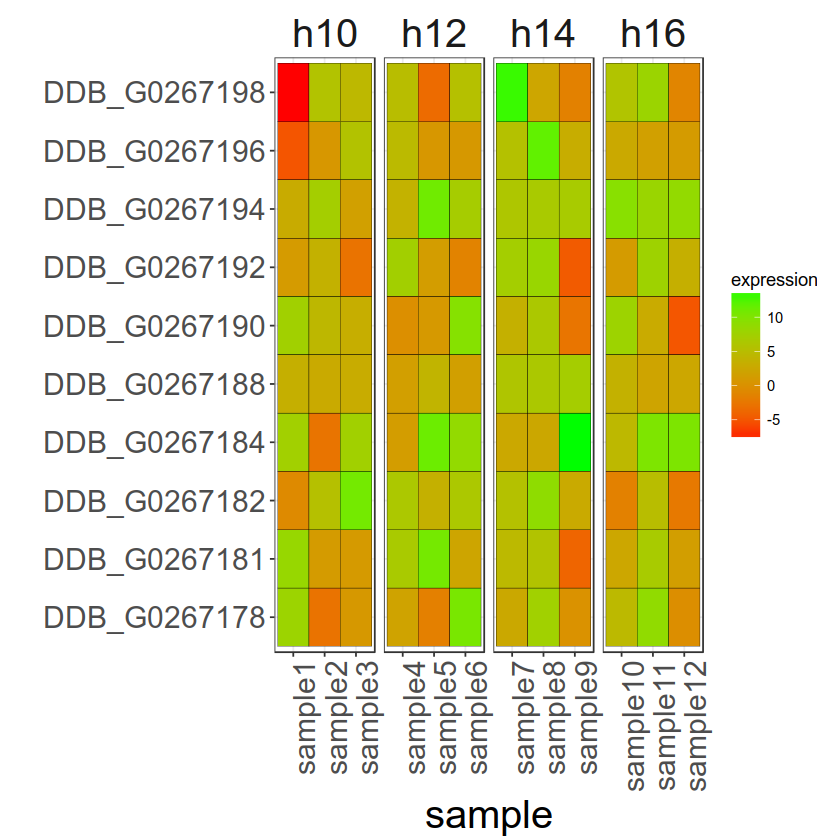

In [43]:
##heatmap
ggplot(df3, aes(samples,genes, fill = expression)) +
    geom_tile(colour = "black") +
    facet_grid(~time,scales ="free") +
    scale_fill_gradient(low="red", high="green") +
    labs(x="sample",
         y="")+
    theme_bw()+
    theme(
        strip.text.x = element_text(size = 24),
        strip.background = element_blank(),
        axis.text.x = element_text(size = 18, angle=90),
        axis.text.y = element_text(size = 18),
        axis.title.x = element_text(size = 24),
        axis.title.y = element_text(size = 24),
    )